A few days ago, [a video](https://www.youtube.com/watch?v=ghxQA3vvhsk) popped up in my YouTube suggestions. We all know how disturbingly powerful the YouTube recommendation algorithm is: more than 90 percent of the times, I thorougly enjoy all suggestions put forth by the mastermind algorithm. This time was no exception: in fact, I enjoyed it so much that I decided to write a short blog post about it. Also a quick plug: if you haven't checked out Matt Parker's channel, I highly recommend that you do.

Let's dive right into today's topic: extending the fibonacci sequence to complex numbers.

# Quick Review

We all know what the fibonacci sequence looks like, but for formality and notational clarity's sake, here is what the fibonacci sequence looks like:

$$
F_n = F_{n - 1} + F_{n - 2}
$$

There are some different conventions as to where the sequence starts. I personally prefer the one that starts from zero, with zero indexing. Here is what I mean:

$$
F_0 = 0, \\
F_1 = 1, \\
F_2 = 1, \\
F_3 = 2, \\
\cdots
$$

# Code Implementation

Implementing fibonacci numbers in code is one of the most common exercises that are used to teach concepts such as recursion, memoization, and dynamic programming. This is certainly not the point of today's post, but here is an obligatory code snippet nonetheless.

In [95]:
def bad_fibonacci(n):
    if n < 0:
        raise ValueError(
            "`n` can only be a non-negative integer."
        )
    if n < 2:
        return n
    return bad_fibonacci(n - 1) + bad_fibonacci(n - 2)

The code above is the standard fibonacci function as we know it, implemented with simple bare bone recursion. While the code works perfectly fine, there is a fatal problem with this code: it recalculates so many values. Namely, in calling `bad_fibonacci(n - 1)`, the program goes all the way up to the $(n - 1)$th fibonacci number. Then, in the next call of `bad_fibonacci(n - 2)`, the program recalculates the same values calculated earlier, up until the $(n - 2)$th fibonacci number, just one short of the previous one. 

## Memoization

The classic way to deal with this problem is to use a technique known as memoization. The idea is simple: we keep some sort of memo or cache of values that have already been calculated and store them in some data structure that we don't have to recalculate values that have already been computed prior. Here is a simple implementation.

In [112]:
cache = {0: 0, 1: 1}

def fibonacci(n):
    if n < 0:
        raise ValueError(
            "`n` can only be a non-negative integer."
        )
    if n in cache:
        return cache[n]
    res = fibonacci(n - 1) + fibonacci(n - 2)
    cache[n] = res
    return res

To see how effective memoization is compared to vanilla recursion, let's use the `timeit` module.

In [113]:
%timeit bad_fibonacci(35)

3.82 s ± 91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Comparing this to the `timeit` test on `fibonacci()` with memoization, the benefits of caching becomes immediately clear:

In [114]:
%timeit fibonacci(35)

152 ns ± 4.33 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


3 second and 150 nanoseconds are different by orders of magnitude, and we only asked the functions to calculate the 35th fibonacci number. We can get a sense of how quickly this disparity would grow if we try to calculate something like the 1000th fibonacci number in the sequence. 

Another perk of using caching as above is that we can now get the full sequence up to the 35th fibonacci number.

In [115]:
cache

{0: 0,
 1: 1,
 2: 1,
 3: 2,
 4: 3,
 5: 5,
 6: 8,
 7: 13,
 8: 21,
 9: 34,
 10: 55,
 11: 89,
 12: 144,
 13: 233,
 14: 377,
 15: 610,
 16: 987,
 17: 1597,
 18: 2584,
 19: 4181,
 20: 6765,
 21: 10946,
 22: 17711,
 23: 28657,
 24: 46368,
 25: 75025,
 26: 121393,
 27: 196418,
 28: 317811,
 29: 514229,
 30: 832040,
 31: 1346269,
 32: 2178309,
 33: 3524578,
 34: 5702887,
 35: 9227465}

## Mathematics of Binet's Formula

Although memoization is interesting, it is not the main topic of today's post. Instead, I want to discuss [Binet's formula](https://artofproblemsolving.com/wiki/index.php/Binet%27s_Formula), a formula with which we can calculate the $n$th fibonacci number. Binet's formula states that

$$
F_n = \frac{1}{\sqrt{5}} \left( \left( \frac{1 + \sqrt{5}}{2} \right)^n - \left( \frac{1 - \sqrt{5}}{2} \right)^n \right)
$$

We can trivially verify that $F_0 = 0$ and that $F_1 = 1$. For more robust empirical verification, we will resort to code later.

It is worth noting that the quantity in the parenthesis, namely

$$
\phi = \frac{1 + \sqrt{5}}{2} \approx 1.61803398875
$$

is otherwise referred to as the Golden ratio. Also observe that the other quantity is the negative inverse of the Golden ratio.

$$
\frac{1 - \sqrt{5}}{2} = - \frac{2}{1 + \sqrt{5}} = - \frac{1}{\phi}
$$

Let's take a closer look at why the Binet's formula makes sense. This is not going to be a rigorous proof or a derivation, but rather an attempt at cursory analysis to provide food for thought. This process was heavily referenced from [this Quora post](https://www.quora.com/How-do-I-derive-Binets-Formula).

Intuitively, Binet's formula has to do with the well-known fact that the ratio between two consecutive fibonacci numbers approaches the Golden ratio as $n$ goes to infinity.

$$
\lim_{n \to \infty} \frac{F_n}{F_{n-1}} = \phi
$$

In this light, we might understand the fibonacci sequence as a geometric sequence with a constant ratio. The goal, then, is to show that the ratio is in fact the Golden ratio. Then, we have the following recurrence relation between consecutive terms.

$$
r^n = r^{n - 1} + r^{n - 2}
$$

Dividing both sides by $r^{n - 2}$, we get

$$
r^2 = r + 1, \\
r^2 - r - 1 = 0
$$

This is a simple quadratic equation that we can easily solve. With some precalculus algebra, we get

$$
r = \frac{1 \pm \sqrt{5}}{2}
$$

And indeed we start to see the Golden ratio and its negative inverse as solutions to the quadratic. This means that we can express the fibonacci sequence as a linear combinations of these two solutions:

$$
F_n = \alpha \left( \frac{1 \pm \sqrt{5}}{2}^n \right) + \beta \left( \frac{1 \pm \sqrt{5}}{2}^n \right)
$$

Much like solving any difference equations, we have two initial conditions, namely that $F_0 = 0$, $F_1 = 1$. We also trivially know that $F_2 = 1$, but only two conditions suffice to ascertain the value of the coefficients, $\alpha$ and $\beta$. With some algebra, one can verify that 

$$
\alpha = \frac{1}{\sqrt{5}}, \, \beta = - \frac{1}{\sqrt{5}}
$$

Putting these together, we finally get Binet's formula:

$$
F_n = \frac{1}{\sqrt{5}} \left( \left( \frac{1 + \sqrt{5}}{2} \right)^n - \left( \frac{1 - \sqrt{5}}{2} \right)^n \right)
$$

## Binet's Formula in Code

An interesting point to note about Binet's formula is that $n$ doesn't necessarily have to be a non-negative integer as we had previously assumed. In fact, it can be any number: rational, irrational, real, or even complex. The fact that the fibonacci numbers can extend to real number indexing becomes more apparent once we code out the formula.

In [116]:
def binet(n):
    golden = (1 + 5**.5) / 2
    return (golden**n - (- 1 / golden)**n) / 5**.5

Nothing special at all, this is just a literal transcription of the formula presented above. But now, watch what happens when we try to get the 1.1th fibonacci number, for instance:

In [117]:
binet(1.1)

(1.009794706934108+0.08139747961593857j)

Lo and behold, we get a complex fibonacci number! I thought this was so fascinating, almost like seeing a magic of some sort. Although I had known about the fibonacci sequence for as long as I can remember, I had never thought about it in continuous terms: in my mind, the fibonacci sequence was, after all, a sequence---a discrete set of numbers adhering to the simple rule that the next number in line is the sum of the previous two.

The intriguing part is that, even in this complex fibonacci madness, the simple rule still holds. For instance,

In [137]:
diff = binet(3.1) - (binet(2.1) + binet(1.1)) 
assert diff.real < 1e-10 and abs(diff.imag) < 1e-10

You might be wondering why we don't compare things exactly by means of

```python
assert binet(3.1) == binet(2.1) + binet(1.1)
```

This is because this equality doesn't hold due to floating point arithematic. Therefore, we simply verify equivalence by comparing their magnitude with an arbitrarily small number, `1e-10`. The takeaway from the code snippet is that 

$$
F_n = F_{n - 1} + F_{n - 2}
$$

holds, regardless of whether or not $n$ is a non-negative integer. Indeed, Binet's formula gives us what we might refer to as the interpolation of the fibonacci sequence, in this case extended along the real number line. 

# Plotting the Fibonacci Sequence

A corollary of the real number interpolation of the fibonacci sequence via Binet's formula is that now we can effectively plot the complex fibonacci numbers on the Cartesian plane. Because $n$ can be continuous, we would expect some graph to appear, where the $x$-axis represents real numbers, and $y$, the imaginary. 

This requires a bit of a hack though; note that the result of Binet's formula is a complex number, or a two-dimensional data point. The input to the function is just a one-dimensional real number. Therefore, we need a way of representing a map from a one-dimensional real number line to a two-dimensional complex plane. This is sort of tricky if you think about it: the normal two-dimensional plane as we know it can only represent a mapping from the $x$-axis to the $y$-axis---in other words, a transformation from one-dimensional space to another one-dimensional space. A three-dimensional $xyz$-coordinate system, on the other hand, represents a transformation from a two-dimensional space, represented by $x$ and $y$, to another one-dimensional space, namely $z$. We aren't used to going to other way around, where a one-dimensional space is mapped to a two-dimensional space, as is the case here.

A simple hack that nonetheless makes a lot of sense in this case is to use the real-number line for two purposes: representing the input dimension, namely the real number line, and one component of the output dimension---the real number portion of the output to Binet's formula. This admittedly results in a loss of information, since finding the point where $n = k$ won't give us the $k$th fibonacci number; instead, it will only tell us what the fibonacci number is whose real number component equals $k$. Nonetheless, this is an approach that makes sense since the real number line is a common dimension in both the input and output data. With this in mind, let's go ahead and try to plot the interpolation of the fibonacci sequence on the complex plane.

First, we import the modules we will need.

In [133]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

Then, we simply specify the domain on the real number line and generate the fibonacci numbers, separating out the real and imaginary components. Note that `x` is not going to be used for plotting; instead, we use `y_real` as the $x$-axis, and this is where the loss of temporal information comes in, as mentioned earlier. 

In [ ]:
x = np.linspace(-10, 10, 200).astype(complex)
y_real = []
y_imag = []
for num in x:
    res = binet(num)
    y_real.append(res.real)
    y_imag.append(res.imag)

Now, let's go ahead and plot it out!

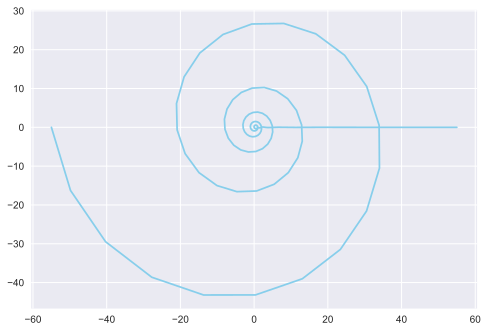

In [134]:
plt.plot(y_real, y_imag, color="skyblue")
plt.show()

And there it is, the full fibonacci sequence, interpolated across the real numbers. When I first saw this pattern in Matt Parker's video, I was simply in awe, a loss of words. There's something inexplicably beautiful and wonderful at this pattern, almost as if it was some part of God's plan. Okay, maybe I'm being too melodramatic about a graph, but there is no denying that this pattern is geometrically interesting and pleasing to the eye. Everything looks so intentional and deliberate.

The comments on the aesthetics of the snail shell aside, one point that deserves our attention is what appears to be a straight line. Well, turns out that this is, in fact, not a straight line. The only reasn why it appears straight is that the snail pattern overshadows the little vibrations on this portion of the graph. Indeed, zooming in, we see that there is an interesting damping motion going on. This is what the fibonacci sequence would have looked like had we plotted only the positive domain of the real number line.

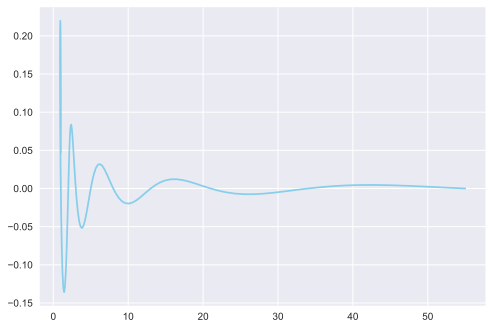

In [138]:
plt.plot(y_real[110:], y_imag[110:], color="skyblue")
plt.show()

# Conclusion

In this post, we took a look at the fibonacci sequence and its interpolation across the real number line. We could go even crazier, as did Matt Parker in his own video, by attempting to interpolate the sequence on the complex number plane, at which point we would now have a mapping from two dimensions to two dimensions, effectively forcing us to think in terms of four dimensions. There is no fast, handy way of drawing or visualizing four dimensions, as we are creatures that are naturally accustomed to three dimensions. There are interesting observations to be made with the full-fledged complex interpolation of the sequence, but I thought this is already interesting as it is nonetheless. 

Nowadays, I'm reminded of just how many things that I thought I knew well---like the fibonacci sequence---are rife with things to study and rejoice in wonder. More so than the value of understanding something brand new, perhaps the value of intellectual exploration lies in realizing just how ignorant one is, as ironic as it sounds. 

I didn't want to end on such a philosophical note, but things have already precipitated contrary to my intentions. Anyhow, I hope you've enjoyred reading this post. Catch you up in the next one.